## Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root_dir = "/content/drive/MyDrive/Colab Notebooks/ML Group assignment"
%cd /content/drive/MyDrive/Colab Notebooks/ML Group assignment
!pwd

/content/drive/MyDrive/Colab Notebooks/ML Group assignment
/content/drive/MyDrive/Colab Notebooks/ML Group assignment


## Import the library

In [ ]:
import re
import pandas as pd
from sklearn.utils import shuffle 
from utils.short_form import SHORT_FORM
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Read the data and shuffle

In [ ]:
# Read data from player and normal excel
player_data = pd.read_excel("Playboy & Playgirl response.xlsx", header=None, names=["message"], index_col=0)
normal_data = pd.read_excel("Normal Response.xlsx", header=None, names=["message"],index_col=0)

# Add label
player_data["label"]=1
normal_data["label"]=0

# Concatenate and shuffle the data
data = player_data.append(normal_data)
data = shuffle(data).reset_index()
data

,message,label
0,"I’m not a dentist, but I bet I could give you ...",1
1,haha same. It's pretty scary when I run out of...,0
2,Took this picture of me out beacuse got too ma...,1
3,I’m so naughty and there’s no one here to make...,1
4,’ll show you mine if you show me yours.,1
...,...,...
2323,Are you also doing science?,0
2324,"haha, very ambitious for a high schooler! Do y...",0
2325,these are important things to do in life 😉,0
2326,I think so too,0


## Data Preprocessing

This function will be added as preprocessor parameter in tfidfVectorizer.

1. Lower-casing
2. Remove number
3. remove punctuation and special character
4. Convert chat conversation short form to word
5. Expand contractions - "doesn't" to "does not"
6. Lemmatization


Function added under other parameter in tfidfVectorizer.
1. Stop word removal

In [ ]:
def preprocess(content):
    content = content.lower()

    # convert short form to word
    content = " ".join([t if t not in SHORT_FORM else SHORT_FORM[t].lower() for t in content.split()])

    tokenizer = RegexpTokenizer(r'[a-z]+')
    tokens = tokenizer.tokenize(content)

    # lemmatization
    lemmatiser = WordNetLemmatizer()
    tokens = [lemmatiser.lemmatize(t.lower(), pos='v') for t in tokens]

    return " ".join(tokens)

In [ ]:
stop_words = ENGLISH_STOP_WORDS

### Spliting the data
70% training 30% testing

In [ ]:
from sklearn import model_selection

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(data['message'],data['label'],test_size=0.3)

In [ ]:
print("Train data size: " + str(Train_X.shape[0]))
print("Test data size: " + str(Test_X.shape[0]))

Train data size: 1629
Test data size: 699


### Word Vectorization (Just For Visualization)
Turning text into numerical feature vectors. The method used below is TF-IDF. TF (Term Frequency) summarize how often a given word appears in the document. IDF (Inverse Document Frequency) down scales words that appears a lot across documents.

In [ ]:
Tfidf_vect = TfidfVectorizer(preprocessor=preprocess, 
                             max_features=5000,
                             stop_words = stop_words,
                             ngram_range = (1,3))

Tfidf_vect.fit(data["message"])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 3), norm='l2',
                preprocessor=<function preprocess at 0x7f76bc798a70>,
                smooth_idf=True,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}),
                strip_accents

##### Unique integer number of each word:

In [ ]:
print(Tfidf_vect.vocabulary_)

{'bet': 119, 'haha': 724, 'pretty': 2753, 'scary': 4110, 'run': 3881, 'things': 4675, 'hold': 801, 'haha pretty': 727, 'pretty scary': 2814, 'scary run': 4118, 'run things': 3912, 'pretty scary run': 2815, 'scary run things': 4119, 'run things hold': 3913, 'picture': 2408, 'men': 1130, 'body': 140, 'naughty': 1481, 'make': 1088, 'naughty make': 1485, 'naughty make behave': 1486, 'll': 1042, 'type': 4792, 'fish': 569, 'care': 198, 'type fish': 4793, 'till': 4708, 'meet': 1121, 'cock': 270, 'hard': 745, 've': 4819, 'wait': 4837, 'long': 1048, 'plan': 2422, 'try': 4769, 'depend': 392, 'day': 369, 'days': 374, 'outdoorsy': 2226, 'just': 896, 'like': 1001, 'inside': 867, 'day days': 371, 'outdoorsy just': 2227, 'just like': 905, 'outdoorsy just like': 2228, 'cool': 315, 'thing': 4674, 'think': 4680, 'morning': 1338, 'naked': 1443, 'morning naked': 1345, 'lick': 988, 'asshole': 65, 'love': 1076, 'pussy': 3033, 'juice': 895, 'sweet': 4614, 'pussy juice': 3041, 'pussy juice sweet': 3043, 'play

(row number, unique integer, score calculated by TF-IDF vectorizer)

In [ ]:
Train_X_Tfidf = Tfidf_vect.transform(Train_X)

print("Train_X data after transform:")
print(Train_X_Tfidf)

Train_X data after transform:
  (0, 4997)	0.22202787969512022
  (0, 4903)	0.17488376504556846
  (0, 4008)	0.26814825756467303
  (0, 4007)	0.26814825756467303
  (0, 4004)	0.19896769076034382
  (0, 2432)	0.22202787969512022
  (0, 2422)	0.15612229797547814
  (0, 1672)	0.26814825756467303
  (0, 1671)	0.26814825756467303
  (0, 1657)	0.1466951648571112
  (0, 1306)	0.26814825756467303
  (0, 1305)	0.26814825756467303
  (0, 1304)	0.23159872284350747
  (0, 726)	0.25465891177828387
  (0, 724)	0.14419883274593984
  (0, 696)	0.1518235761107921
  (0, 627)	0.25465891177828387
  (0, 626)	0.23766434593838143
  (0, 622)	0.15555358634531619
  (0, 30)	0.21460415700360502
  (1, 4883)	0.42931820123095044
  (1, 4782)	0.24129034926751347
  (1, 4758)	0.3889326417299113
  (1, 4495)	0.22992552949612202
  (1, 4472)	0.21172016982142883
  :	:
  (1623, 3405)	0.33150661820019867
  (1623, 3309)	0.22167829574298895
  (1623, 611)	0.2515606955262313
  (1624, 4680)	0.24688470727726164
  (1624, 1589)	0.5509858628408395
  (

## Training
Testing on different classifier:

1) Multinomial Naive Bayes

2) LGBM classifier

3) Random Forest Classifier

4) Support Vector Classifier


GridSearchCV is used to choose the best combination of parameter. (5 folds)

### Import Library for training

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
import warnings
warnings.filterwarnings("ignore")

1) Multinomial Naive Bayes Classifier

In [ ]:
nb_parameter = {'tfidf__ngram_range': [(1, 1), (1, 2), (1,3)],
                'tfidf__stop_words': [stop_words],
                'tfidf__preprocessor': [None, preprocess],
                 'clf__alpha': (1e-2, 1e-3)
 }

nb_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
                    ])

nb_gs = GridSearchCV(nb_pipe, nb_parameter, scoring='accuracy', cv=5)

nb_gs.fit(Train_X, Train_Y)

print(nb_gs.best_params_)

nb_pred = nb_gs.predict(Test_X)

print("Accuracy score for Naive Bayes: " + str(accuracy_score(nb_pred, Test_Y)))

{'clf__alpha': 0.01, 'tfidf__ngram_range': (1, 3), 'tfidf__preprocessor': None, 'tfidf__stop_words': frozenset({'made', 'much', 'alone', 'becoming', 'now', 'anyone', 'only', 'above', 'yours', 'at', 'wherever', 'though', 'else', 'everywhere', 'front', 'about', 'until', 'again', 'sincere', 'bottom', 'side', 'cannot', 'which', 'thick', 'anywhere', 'throughout', 'almost', 'whereas', 'there', 'became', 'around', 'each', 'whose', 'done', 'across', 'last', 'everything', 'well', 'hers', 'amoungst', 'other', 'him', 'as', 'inc', 'whole', 'us', 'these', 'will', 'two', 'am', 'rather', 're', 'against', 'empty', 'full', 'this', 'so', 'keep', 'on', 'no', 'up', 'to', 'toward', 'she', 'four', 'twenty', 'mostly', 'due', 'etc', 'everyone', 'nobody', 'both', 'among', 'system', 'own', 'latterly', 'forty', 'fire', 'describe', 'since', 'herein', 'take', 'thereby', 'that', 'mine', 'whom', 'none', 'such', 'but', 'why', 'con', 'during', 'third', 'ltd', 'yet', 'twelve', 'already', 'one', 'show', 'several', 'via'

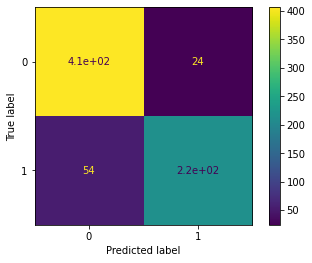

In [ ]:
plot_confusion_matrix(nb_gs, Test_X, Test_Y)  

In [ ]:
print(classification_report(nb_pred, Test_Y))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       460
           1       0.80      0.90      0.85       239

    accuracy                           0.89       699
   macro avg       0.87      0.89      0.88       699
weighted avg       0.89      0.89      0.89       699



2. LGBM Classifier

In [ ]:
lgbm_parameter = {'tfidf__ngram_range': [(1, 1), (1, 2), (1,3)],
                'tfidf__stop_words': [stop_words],
                'tfidf__preprocessor': [None, preprocess],
                 'clf__num_leaves':[31, 40, 50], 
                'clf__max_depth':[3, 4, 5], 
                'clf__learning_rate':[0.1, 0.15, 0.2], 
                'clf__n_estimators':[700]
 }

lgbm_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LGBMClassifier()),
                    ])

lgbm_gs = GridSearchCV(lgbm_pipe, lgbm_parameter, scoring='accuracy', cv=5)

lgbm_gs.fit(Train_X, Train_Y)

print(lgbm_gs.best_params_)

lgbm_pred = lgbm_gs.predict(Test_X)

print("Accuracy score for LGBM: " + str(accuracy_score(lgbm_pred, Test_Y)))

{'clf__learning_rate': 0.1, 'clf__max_depth': 4, 'clf__n_estimators': 700, 'clf__num_leaves': 31, 'tfidf__ngram_range': (1, 1), 'tfidf__preprocessor': <function preprocess at 0x7f76bc798a70>, 'tfidf__stop_words': frozenset({'made', 'much', 'alone', 'becoming', 'now', 'anyone', 'only', 'above', 'yours', 'at', 'wherever', 'though', 'else', 'everywhere', 'front', 'about', 'until', 'again', 'sincere', 'bottom', 'side', 'cannot', 'which', 'thick', 'anywhere', 'throughout', 'almost', 'whereas', 'there', 'became', 'around', 'each', 'whose', 'done', 'across', 'last', 'everything', 'well', 'hers', 'amoungst', 'other', 'him', 'as', 'inc', 'whole', 'us', 'these', 'will', 'two', 'am', 'rather', 're', 'against', 'empty', 'full', 'this', 'so', 'keep', 'on', 'no', 'up', 'to', 'toward', 'she', 'four', 'twenty', 'mostly', 'due', 'etc', 'everyone', 'nobody', 'both', 'among', 'system', 'own', 'latterly', 'forty', 'fire', 'describe', 'since', 'herein', 'take', 'thereby', 'that', 'mine', 'whom', 'none', 's

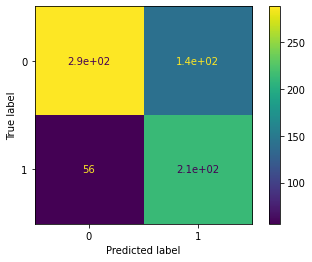

In [ ]:
plot_confusion_matrix(lgbm_gs, Test_X, Test_Y)  

In [ ]:
print(classification_report(lgbm_pred, Test_Y))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74       344
           1       0.79      0.60      0.68       355

    accuracy                           0.72       699
   macro avg       0.73      0.72      0.71       699
weighted avg       0.73      0.72      0.71       699



3) Random Forest Classifier

In [ ]:
rf_parameter = {'tfidf__ngram_range': [(1, 1), (1, 2), (1,3)],
                'tfidf__stop_words': [stop_words],
                'tfidf__preprocessor': [None, preprocess],
                'clf__max_depth':[40, 80], 
                'clf__min_samples_split' :[2,5,10], 
                'clf__n_estimators':[900]
 }

rf_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier()),
                    ])

rf_gs = GridSearchCV(rf_pipe, rf_parameter, scoring='accuracy', cv=5)

rf_gs.fit(Train_X, Train_Y)

print(rf_gs.best_params_)

rf_pred = rf_gs.predict(Test_X)

print("Accuracy score for Random Forest: " + str(accuracy_score(rf_pred, Test_Y)))

{'clf__max_depth': 80, 'clf__min_samples_split': 10, 'clf__n_estimators': 900, 'tfidf__ngram_range': (1, 1), 'tfidf__preprocessor': <function preprocess at 0x7f76bc798a70>, 'tfidf__stop_words': frozenset({'made', 'much', 'alone', 'becoming', 'now', 'anyone', 'only', 'above', 'yours', 'at', 'wherever', 'though', 'else', 'everywhere', 'front', 'about', 'until', 'again', 'sincere', 'bottom', 'side', 'cannot', 'which', 'thick', 'anywhere', 'throughout', 'almost', 'whereas', 'there', 'became', 'around', 'each', 'whose', 'done', 'across', 'last', 'everything', 'well', 'hers', 'amoungst', 'other', 'him', 'as', 'inc', 'whole', 'us', 'these', 'will', 'two', 'am', 'rather', 're', 'against', 'empty', 'full', 'this', 'so', 'keep', 'on', 'no', 'up', 'to', 'toward', 'she', 'four', 'twenty', 'mostly', 'due', 'etc', 'everyone', 'nobody', 'both', 'among', 'system', 'own', 'latterly', 'forty', 'fire', 'describe', 'since', 'herein', 'take', 'thereby', 'that', 'mine', 'whom', 'none', 'such', 'but', 'why',

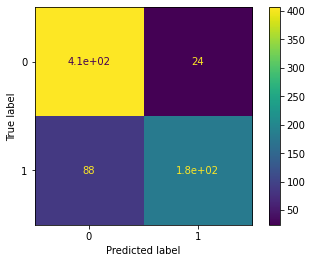

In [ ]:
plot_confusion_matrix(rf_gs, Test_X, Test_Y)

In [ ]:
print(classification_report(rf_pred, Test_Y))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       494
           1       0.67      0.88      0.76       205

    accuracy                           0.84       699
   macro avg       0.81      0.85      0.82       699
weighted avg       0.86      0.84      0.85       699



4) Support Vector Classifier

In [ ]:
svc_parameter = {'tfidf__ngram_range': [(1, 1), (1, 2), (1,3)],
                'tfidf__stop_words': [stop_words],
                'tfidf__preprocessor': [None, preprocess],
                'clf__kernel':['rbf', 'poly', 'linear'], 
                'clf__degree' :[3,4],  # degree for poly
                'clf__tol':[0.001,0.002],  # tolerance for stopping criteria
                'clf__cache_size': [200,300], # kernel cache size,
                'clf__probability': [True]
 }

svc_pipe = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', SVC()),
                    ])

svc_gs = GridSearchCV(svc_pipe, svc_parameter, scoring='accuracy', cv=5)

svc_gs.fit(Train_X, Train_Y)

print(svc_gs.best_params_)

svc_pred = svc_gs.predict(Test_X)

print("Accuracy score for SVC: " + str(accuracy_score(svc_pred, Test_Y)))

{'clf__cache_size': 200, 'clf__degree': 3, 'clf__kernel': 'linear', 'clf__probability': True, 'clf__tol': 0.001, 'tfidf__ngram_range': (1, 2), 'tfidf__preprocessor': <function preprocess at 0x7f76bc798a70>, 'tfidf__stop_words': frozenset({'made', 'much', 'alone', 'becoming', 'now', 'anyone', 'only', 'above', 'yours', 'at', 'wherever', 'though', 'else', 'everywhere', 'front', 'about', 'until', 'again', 'sincere', 'bottom', 'side', 'cannot', 'which', 'thick', 'anywhere', 'throughout', 'almost', 'whereas', 'there', 'became', 'around', 'each', 'whose', 'done', 'across', 'last', 'everything', 'well', 'hers', 'amoungst', 'other', 'him', 'as', 'inc', 'whole', 'us', 'these', 'will', 'two', 'am', 'rather', 're', 'against', 'empty', 'full', 'this', 'so', 'keep', 'on', 'no', 'up', 'to', 'toward', 'she', 'four', 'twenty', 'mostly', 'due', 'etc', 'everyone', 'nobody', 'both', 'among', 'system', 'own', 'latterly', 'forty', 'fire', 'describe', 'since', 'herein', 'take', 'thereby', 'that', 'mine', 'wh

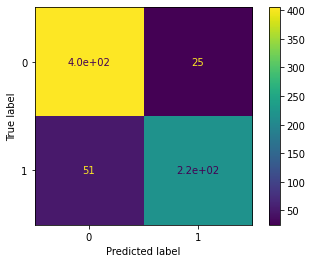

In [ ]:
plot_confusion_matrix(svc_gs, Test_X, Test_Y)

In [ ]:
print(classification_report(svc_pred, Test_Y))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       456
           1       0.81      0.90      0.85       243

    accuracy                           0.89       699
   macro avg       0.88      0.89      0.88       699
weighted avg       0.90      0.89      0.89       699



Conclusion:

In [ ]:
acc_list = [accuracy_score(nb_pred, Test_Y), accuracy_score(lgbm_pred, Test_Y), accuracy_score(rf_pred, Test_Y), accuracy_score(svc_pred, Test_Y)]

print("Accuracy score for Naive Bayes: " + str(acc_list[0]))
print("Accuracy score for LGBM: " + str(acc_list[1]))
print("Accuracy score for Random Forest: " + str(acc_list[2]))
print("Accuracy score for SVC: " + str(acc_list[3]))

best_acc = max(acc_list)
best_model = ""

if best_acc == acc_list[0]:
  best_model="Naive Bayes"
elif best_acc == acc_list[1]:
  best_model="LGBM"
elif best_acc == acc_list[2]:
  best_model="Random Forest"
elif best_acc == acc_list[3]:
  best_model="SVC"

print("Model with highest accuracy: " + best_model)

Accuracy score for Naive Bayes: 0.8884120171673819
Accuracy score for LGBM: 0.7167381974248928
Accuracy score for Random Forest: 0.8397711015736766
Accuracy score for SVC: 0.8912732474964234
Model with highest accuracy: SVC


## Export the best model

In [ ]:
import pickle

with open('model.pkl', 'wb') as myfile:
    pickle.dump(svc_gs,myfile)